EDA (ANALISIS EXPLORATORIO DE DATOS)- PROYECTO INDIVIDUAL 1 - HENRY MLOPS

Roberto Pedro- DATA12

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
%matplotlib inline
from wordcloud import WordCloud
import seaborn as sns

In [70]:
credits = pd.read_csv("CREDITS_ETL.csv") 
movies = pd.read_csv("MOVIES_ETL.csv" )

In [71]:
df = pd.merge(movies, credits, on='id', how='inner')

In [72]:
df.head()

,Unnamed: 0_x,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,...,spoken_languages,status,tagline,title,vote_average,vote_count,release_year,return,Unnamed: 0_y,crew
0,0,Toy Story Collection,30000000.0,"['Animation', 'Comedy', 'Family']",862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,['Pixar Animation Studios'],['United States of America'],...,['English'],Released,NaN,Toy Story,7.7,5415.0,1995,12.451801,0,['John Lasseter']
1,1,NaN,65000000.0,"['Adventure', 'Fantasy', 'Family']",8844,en,When siblings Judy and Peter discover an encha...,17.015539,"['TriStar Pictures', 'Teitler Film', 'Intersco...",['United States of America'],...,"['English', 'Français']",Released,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0,1995,4.043035,1,['Joe Johnston']
2,2,Grumpy Old Men Collection,0.0,"['Romance', 'Comedy']",15602,en,A family wedding reignites the ancient feud be...,11.712900,"['Warner Bros.', 'Lancaster Gate']",['United States of America'],...,['English'],Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,92.0,1995,0.000000,2,['Howard Deutch']
3,3,NaN,16000000.0,"['Comedy', 'Drama', 'Romance']",31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,['Twentieth Century Fox Film Corporation'],['United States of America'],...,['English'],Released,Friends are the people who let you be yourself...,Waiting to Exhale,6.1,34.0,1995,5.090760,3,['Forest Whitaker']
4,4,Father of the Bride Collection,0.0,['Comedy'],11862,en,Just when George Banks has recovered from his ...,8.387519,"['Sandollar Productions', 'Touchstone Pictures']",['United States of America'],...,['English'],Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,5.7,173.0,1995,inf,4,['Charles Shyer']


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45345 entries, 0 to 45344
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0_x           45345 non-null  int64  
 1   belongs_to_collection  4485 non-null   object 
 2   budget                 45345 non-null  float64
 3   genres                 42962 non-null  object 
 4   id                     45345 non-null  int64  
 5   original_language      45334 non-null  object 
 6   overview               44404 non-null  object 
 7   popularity             45345 non-null  float64
 8   production_companies   33557 non-null  object 
 9   production_countries   39138 non-null  object 
 10  release_date           45345 non-null  object 
 11  revenue                45345 non-null  float64
 12  runtime                45099 non-null  float64
 13  spoken_languages       41580 non-null  object 
 14  status                 45265 non-null  object 
 15  ta

Eliminar columnas

In [74]:
df.drop(["Unnamed: 0_x", "Unnamed: 0_y"], axis = 1, inplace = True)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45345 entries, 0 to 45344
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   belongs_to_collection  4485 non-null   object 
 1   budget                 45345 non-null  float64
 2   genres                 42962 non-null  object 
 3   id                     45345 non-null  int64  
 4   original_language      45334 non-null  object 
 5   overview               44404 non-null  object 
 6   popularity             45345 non-null  float64
 7   production_companies   33557 non-null  object 
 8   production_countries   39138 non-null  object 
 9   release_date           45345 non-null  object 
 10  revenue                45345 non-null  float64
 11  runtime                45099 non-null  float64
 12  spoken_languages       41580 non-null  object 
 13  status                 45265 non-null  object 
 14  tagline                20387 non-null  object 
 15  ti

Descripcion estadiscticas de variables numericas

In [76]:
df.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count,release_year,return
count,4.534500e+04,45345.000000,45345.000000,4.534500e+04,45099.000000,45345.000000,45345.000000,45345.000000,45345.0
mean,4.232673e+06,108035.740479,2.926248,1.123390e+07,94.179893,5.624320,110.137722,1991.882280,inf
std,1.744391e+07,112180.079341,6.011023,6.441058e+07,38.346636,1.915178,491.904428,24.053016,NaN
min,0.000000e+00,2.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1874.000000,0.0
25%,0.000000e+00,26390.000000,0.388826,0.000000e+00,85.000000,5.000000,3.000000,1978.000000,0.0
50%,0.000000e+00,59852.000000,1.130269,0.000000e+00,95.000000,6.000000,10.000000,2001.000000,0.0
75%,0.000000e+00,156597.000000,3.689610,0.000000e+00,107.000000,6.800000,34.000000,2010.000000,0.0
max,3.800000e+08,469172.000000,547.488298,2.787965e+09,1256.000000,10.000000,14075.000000,2020.000000,inf


In [77]:
df_2=  df[["budget", "revenue","popularity", "runtime", "original_language", "genres","production_companies"]]

Grafico para observar correlaciones

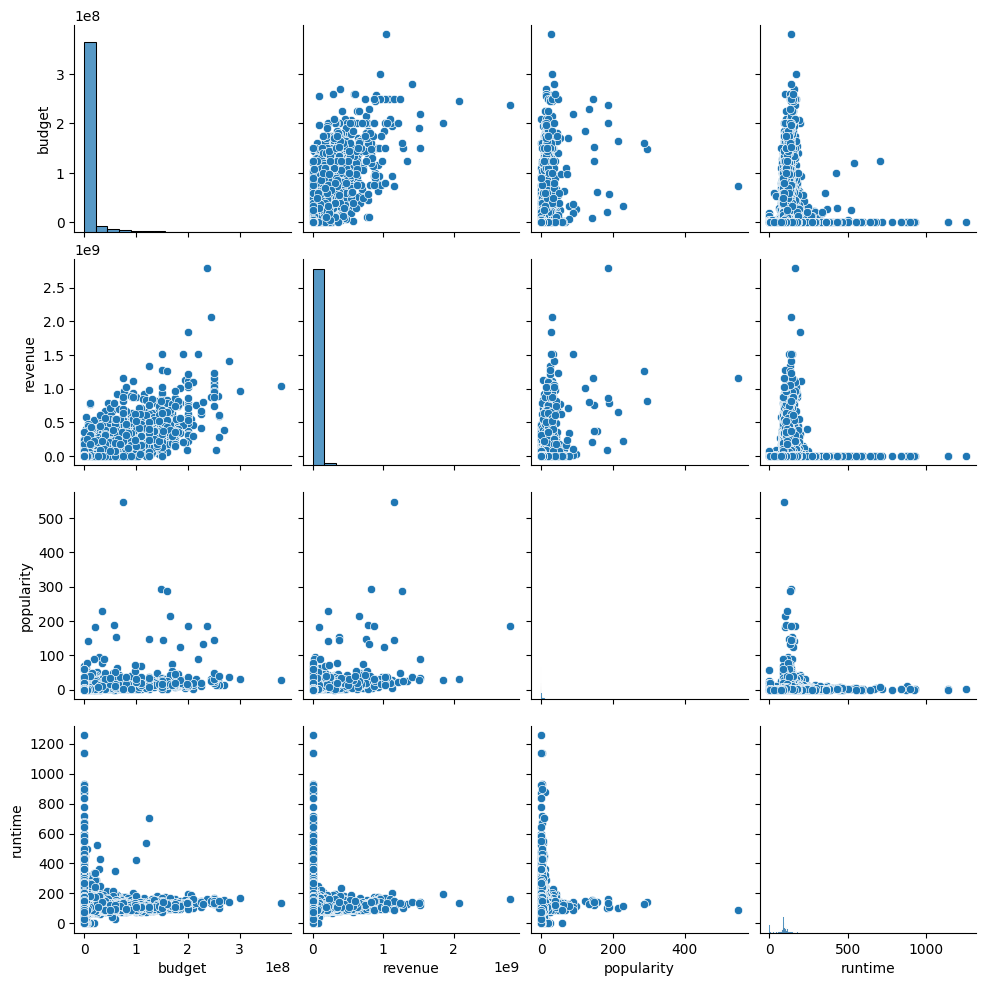

In [79]:

sns.pairplot(data=df_2)

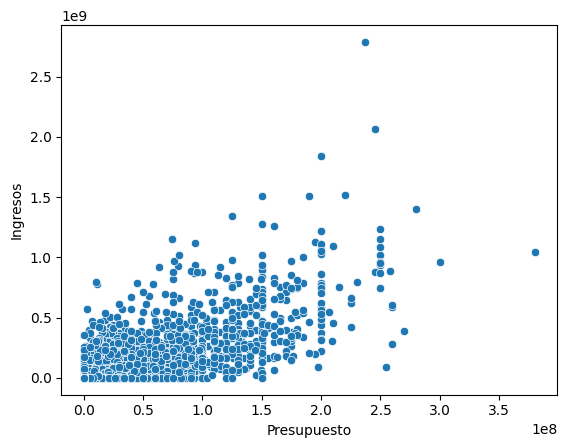

In [80]:
# Crear el gráfico de dispersión
ax = sns.scatterplot(x="budget", y="revenue", data=df_2)

# Ajustar los ejes x e y
ax.set_xlabel("Presupuesto")
ax.set_ylabel("Ingresos")

# Mostrar el gráfico
plt.show()

Observar valores faltantes y nulos

<Axes: >

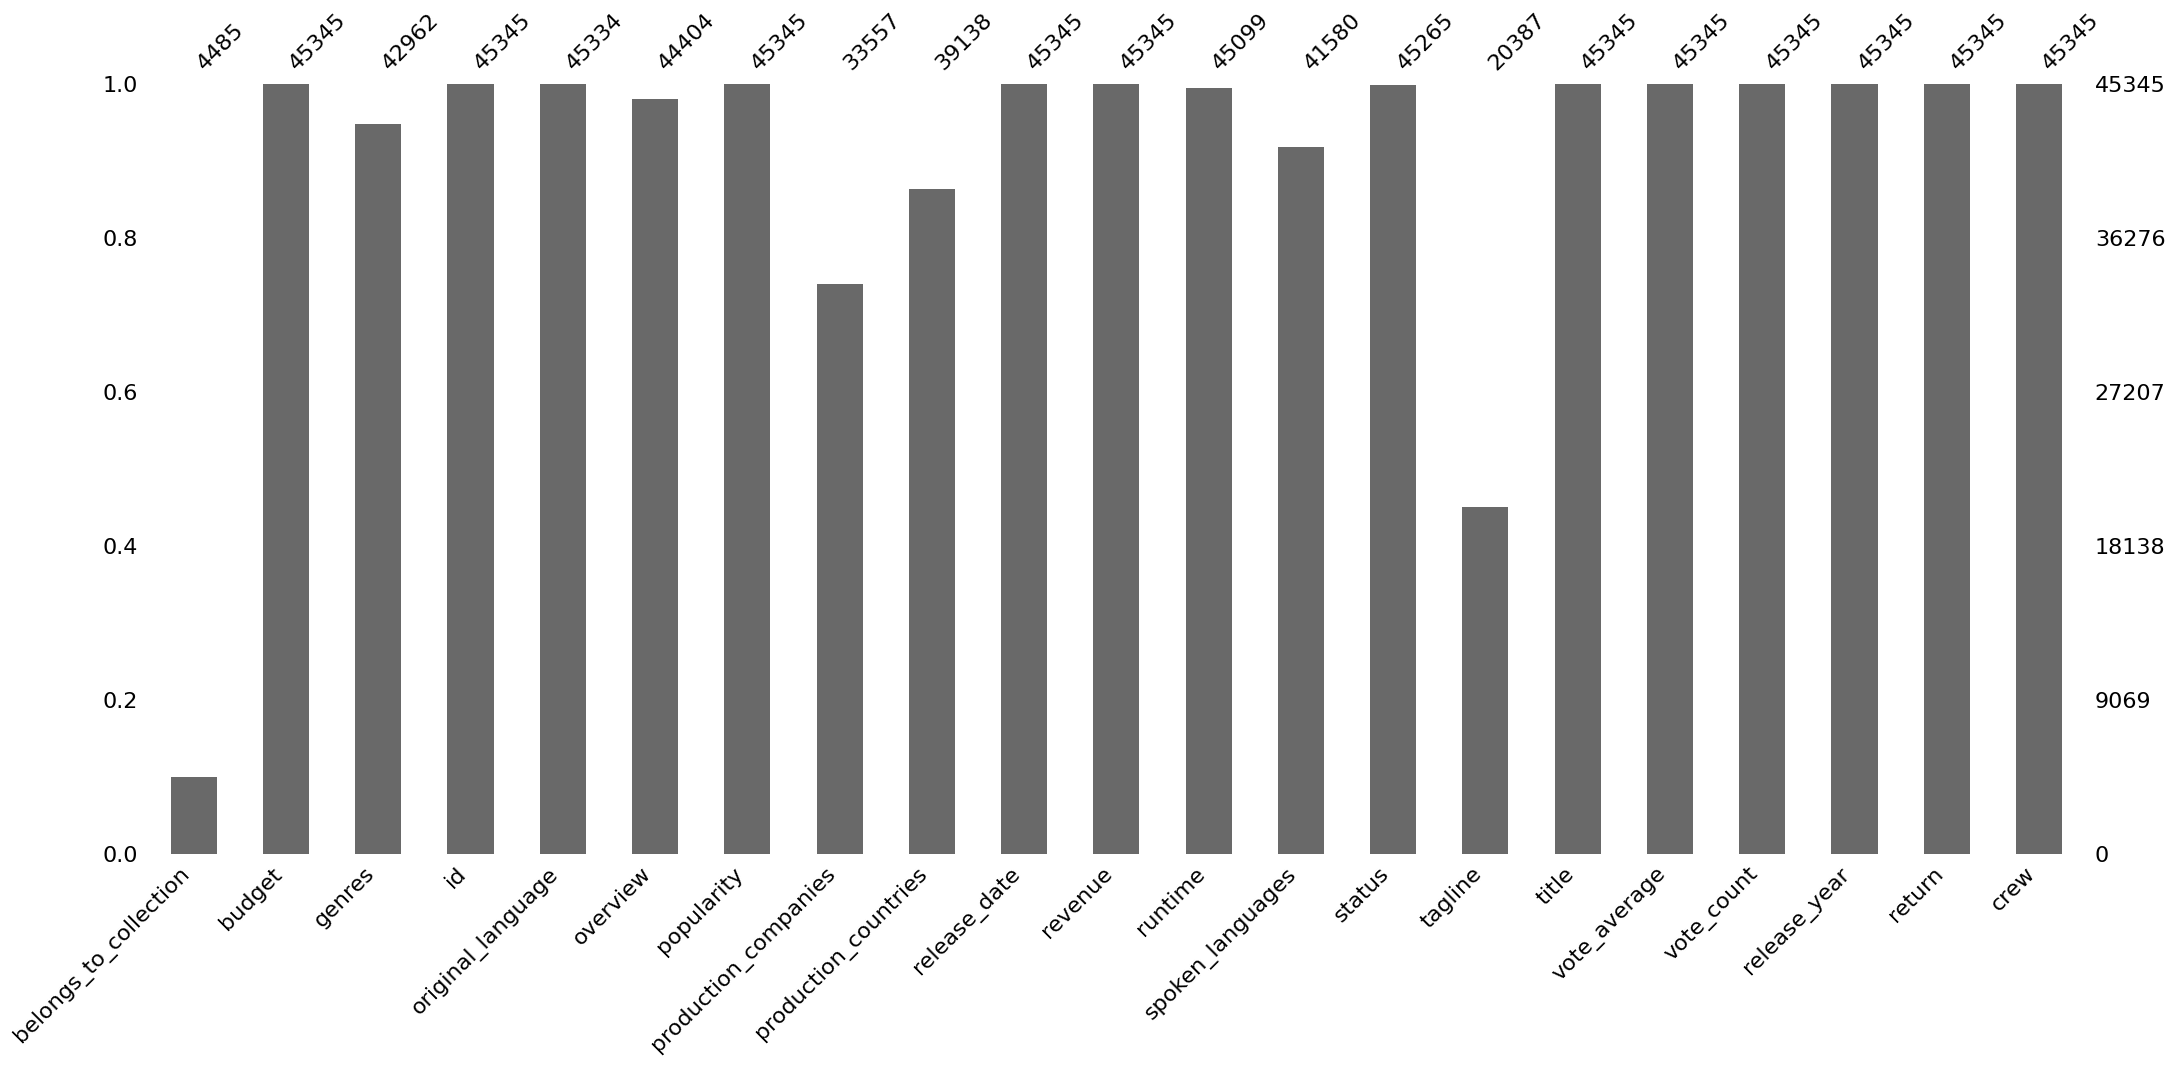

In [81]:
msno.bar(df)

In [82]:
df.isna().sum()

belongs_to_collection    40860
budget                       0
genres                    2383
id                           0
original_language           11
overview                   941
popularity                   0
production_companies     11788
production_countries      6207
release_date                 0
revenue                      0
runtime                    246
spoken_languages          3765
status                      80
tagline                  24958
title                        0
vote_average                 0
vote_count                   0
release_year                 0
return                       0
crew                         0
dtype: int64

 Gráfico que muestra una matriz de valores faltantes para visualizar la distribución y el patrón de los valores faltantes 

<Axes: >

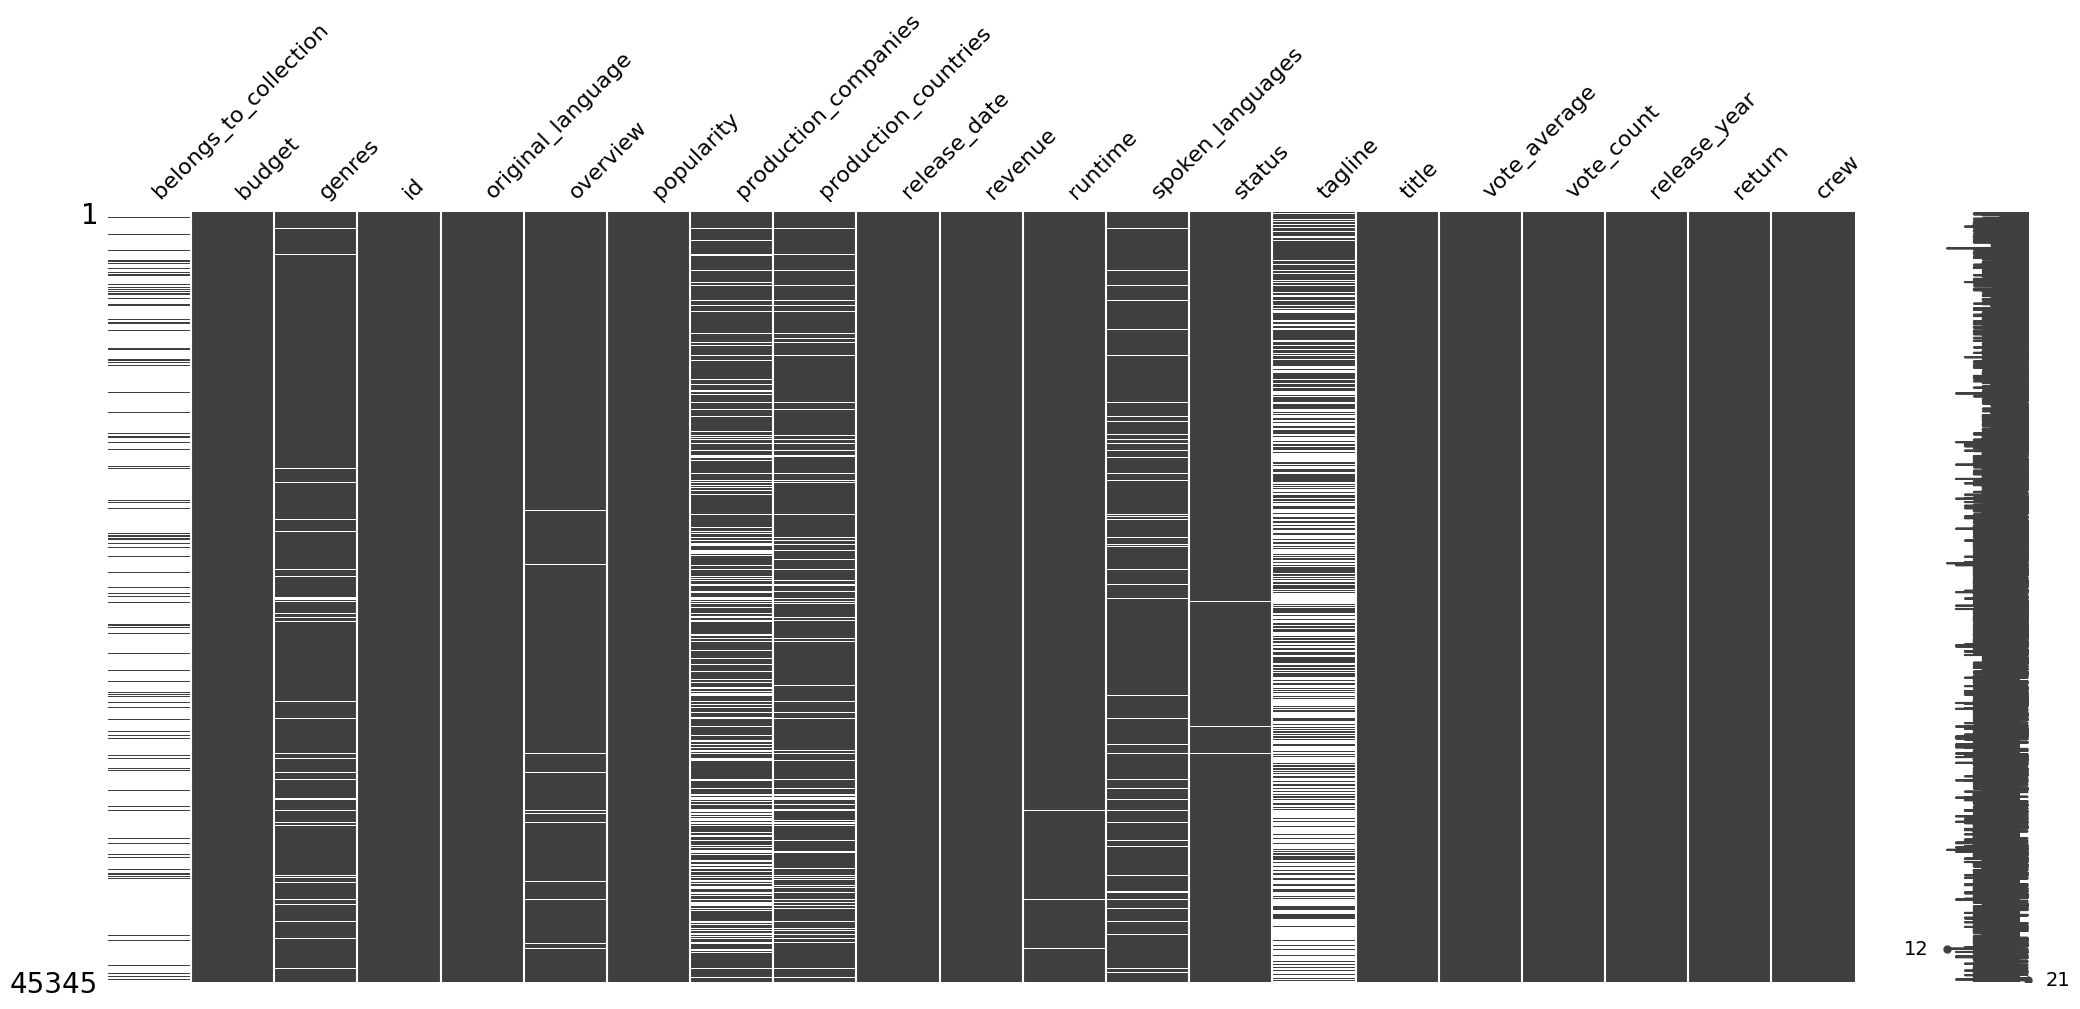

In [83]:
msno.matrix(df)

Visualizando las 10 peliculas mas populares

Text(0, 0.5, 'movies')

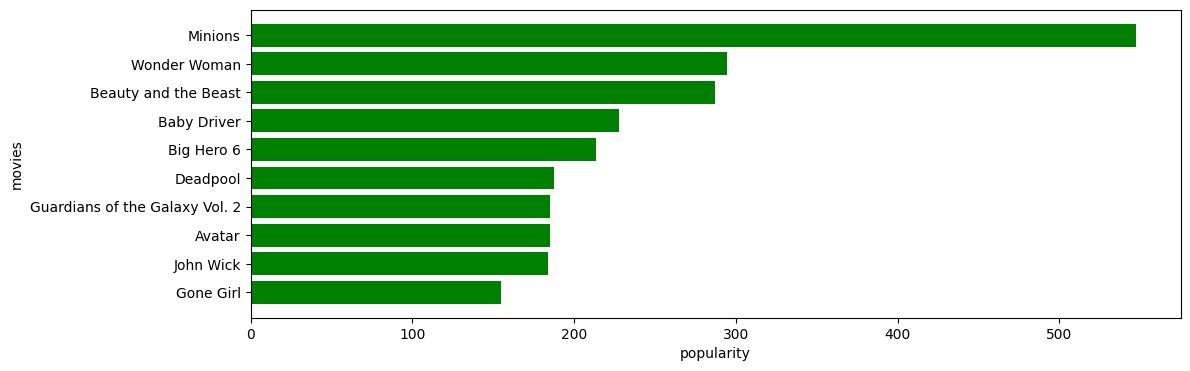

In [84]:
popular=df.sort_values("popularity",ascending=False)
plt.figure(figsize=(12,4))
plt.barh(popular.title.head(10),popular.popularity.head(10),align='center',color="green")
plt.gca().invert_yaxis()
plt.xlabel("popularity")
plt.ylabel("movies")

Visualizando las 10 idiomas mas populares

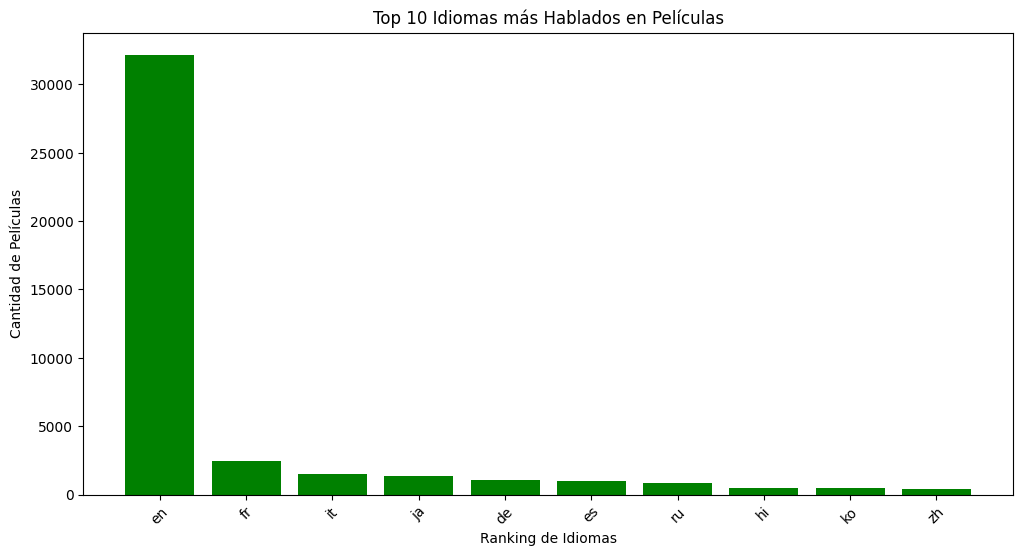

In [85]:

language_counts = df['original_language'].value_counts().head(10)

# Configurar el gráfico de barras en color verde
plt.figure(figsize=(12, 6))
plt.bar(language_counts.index, language_counts.values, color='green')

# Configurar etiquetas y título del gráfico
plt.xlabel('Ranking de Idiomas')
plt.ylabel('Cantidad de Películas')
plt.title('Top 10 Idiomas más Hablados en Películas')

# Rotar las etiquetas del eje x para mayor legibilidad
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()


Cantidad de peliculas por idiomas

In [86]:
language_counts = df['original_language'].value_counts().head(20)
print(language_counts)

original_language
en    32184
fr     2435
it     1528
ja     1346
de     1077
es      991
ru      822
hi      508
ko      444
zh      408
sv      383
pt      315
cn      313
fi      293
nl      247
da      224
pl      218
tr      150
cs      130
el      113
Name: count, dtype: int64


Ver las colecciones con mas peliculas

In [87]:
dale=pd.DataFrame(df.belongs_to_collection.value_counts())
dale

,count
belongs_to_collection,
The Bowery Boys,29
Totò Collection,27
James Bond Collection,26
Zatôichi: The Blind Swordsman,26
The Carry On Collection,25
...,...
Glass Tiger collection,1
Kathleen Madigan Collection,1
The Big Bottom Box,1


In [88]:
df_sagas = df['belongs_to_collection'].value_counts().reset_index()
df_sagas.columns = ['collection_name', 'count']
popular = df_sagas.sort_values('count', ascending=False)

Text(0, 0.5, 'Collection Name')

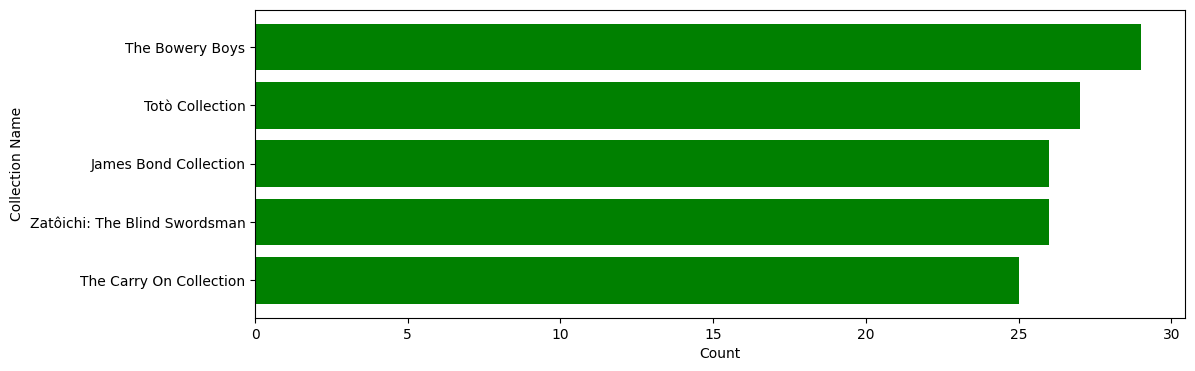

In [89]:

plt.figure(figsize=(12, 4))
plt.barh(popular['collection_name'].head(5), popular['count'].head(5), align='center', color="green")
plt.gca().invert_yaxis()
plt.xlabel("Count")
plt.ylabel("Collection Name")

Nubes de palabras, cuáles palabras son más frecuentes en  resumen (overview) 

In [90]:
df['overview'] = df['overview'].astype(str)

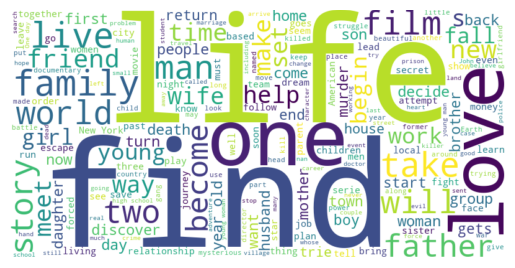

In [91]:
# Seleccionar la columna "text" del DataFrame
text_data = df["overview"]

# Crear el objeto WordCloud y generar el WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(text_data))

# Visualizar el WordCloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


Nubes de palabras, cuáles palabras son más frecuentes en los títulos

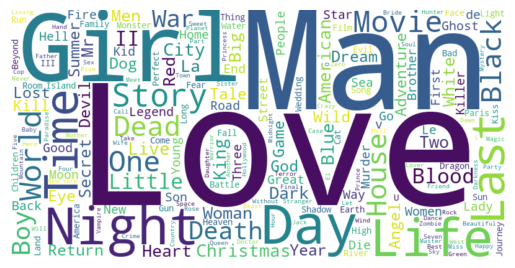

In [92]:
# Seleccionar la columna "text" del DataFrame
text_data = df["title"]

# Crear el objeto WordCloud y generar el WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(text_data))

# Visualizar el WordCloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45345 entries, 0 to 45344
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   belongs_to_collection  4485 non-null   object 
 1   budget                 45345 non-null  float64
 2   genres                 42962 non-null  object 
 3   id                     45345 non-null  int64  
 4   original_language      45334 non-null  object 
 5   overview               45345 non-null  object 
 6   popularity             45345 non-null  float64
 7   production_companies   33557 non-null  object 
 8   production_countries   39138 non-null  object 
 9   release_date           45345 non-null  object 
 10  revenue                45345 non-null  float64
 11  runtime                45099 non-null  float64
 12  spoken_languages       41580 non-null  object 
 13  status                 45265 non-null  object 
 14  tagline                20387 non-null  object 
 15  ti

**Observaciones**:

-la puplaridad está altamente correlacionada en general con la cantidad de votos , con ingresos y presupuesto.

-ingreso está altamente correlacionado en general con cantidad de votos. 

-el presupuesto es un ingreso altamente correlacionado en general.

-Las palabras que mas se repiten en los titulos son: Amor, Hombre, mujer, dia.

-El idioma mas hablado en las peliculas es el Ingles, se obeservan mas de 32.000 .




Importar dataframe

In [94]:
df.to_csv("DATA_EDA.csv")

visualizacion: prueba y control del dataframe

In [95]:
prueba = pd.read_csv("DATA_EDA.csv",  index_col=0)

In [96]:
prueba.head()

,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,release_year,return,crew
0,Toy Story Collection,30000000.0,"['Animation', 'Comedy', 'Family']",862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,['Pixar Animation Studios'],['United States of America'],1995-10-30,...,81.0,['English'],Released,NaN,Toy Story,7.7,5415.0,1995,12.451801,['John Lasseter']
1,NaN,65000000.0,"['Adventure', 'Fantasy', 'Family']",8844,en,When siblings Judy and Peter discover an encha...,17.015539,"['TriStar Pictures', 'Teitler Film', 'Intersco...",['United States of America'],1995-12-15,...,104.0,"['English', 'Français']",Released,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0,1995,4.043035,['Joe Johnston']
2,Grumpy Old Men Collection,0.0,"['Romance', 'Comedy']",15602,en,A family wedding reignites the ancient feud be...,11.712900,"['Warner Bros.', 'Lancaster Gate']",['United States of America'],1995-12-22,...,101.0,['English'],Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,92.0,1995,0.000000,['Howard Deutch']
3,NaN,16000000.0,"['Comedy', 'Drama', 'Romance']",31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,['Twentieth Century Fox Film Corporation'],['United States of America'],1995-12-22,...,127.0,['English'],Released,Friends are the people who let you be yourself...,Waiting to Exhale,6.1,34.0,1995,5.090760,['Forest Whitaker']
4,Father of the Bride Collection,0.0,['Comedy'],11862,en,Just when George Banks has recovered from his ...,8.387519,"['Sandollar Productions', 'Touchstone Pictures']",['United States of America'],1995-02-10,...,106.0,['English'],Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,5.7,173.0,1995,inf,['Charles Shyer']
